# pyIsoDep

Copyright (c) Dan Kotlyar

# Custom Xenon and Samarium Chains

##  Description

Example on how to execute a full depletion calculations.

## Load modules

In [3]:
import numpy as np
from pyIsoDep.functions.maindepletionsolver import MainDepletion
from pyIsoDep.functions.generatedata import TransmutationData
from pyIsoDep.functions.postprocessresults import Results

### Define xenon- and samarium- data

In [4]:
ID = [531350, 541350, 611490, 621490, 922350, 922380]
sig_c = [6.8, 250537.62, 132.47, 6968.75, 5.0, 8.0]
sig_f = [0.0, 0.0000000, 0.000, 0.00000, 97., 3.8]
kappa = [0.0, 0.0000000, 0.000, 0.00000, 202.44, 202.44]
N0 = [0.0, 0.0000000, 0.000, 0.00000, 6.43230E-04, 2.58062E-03]

#    531350, 541350, 611490, 621490, 922350, 922380
mtxFY = [
    [0.0000, 0.0000, 0.0000, 0.0000, 0.06306, 0.06306],  # 531350
    [0.0000, 0.0000, 0.0000, 0.0000, 0.00248, 0.00248],  # 541350
    [0.0000, 0.0000, 0.0000, 0.0000, 0.01100, 0.01100],  # 611490
    [0.0000, 0.0000, 0.0000, 0.0000, 0.00000, 0],  # 621490
    [0.0000, 0.0000, 0.0000, 0.0000, 0.00000, 0],  # 922350
    [0.0000, 0.0000, 0.0000, 0.0000, 0.00000, 0],  # 922380
    ]

### Data Generation Stage

In [5]:
# Reset the data container
data = TransmutationData(libraryFlag=True, wgtFY=1.0)
# Feed cross sections into the container
data.ReadData(ID, sig_f=sig_f, sig_c=sig_c, fymtx=mtxFY, EfissMeV=kappa)
# Condense the data only to specific set of isotopes
data.Condense(ID)

### Depletion Stage

#### Define metadata

In [6]:
volume = 332097.750  # volume in cm**3

timepoints = np.linspace(0, 48.0, 24)
power = 330000000.*np.ones(len(timepoints)-1)  # Watts

#### Execute Depletion

In [7]:
dep = MainDepletion(0.0, data)
dep.SetDepScenario(power=power, timeUnits="hours", timepoints=timepoints)
# set initial composition
dep.SetInitialComposition(ID, N0, vol=volume)
# solve the Bateman equations
dep.SolveDepletion(method="cram")

#### Post depletion analysis

In [8]:
dep.DecayHeat()
dep.Radiotoxicity()
dep.Activity()
dep.Mass()

### Post-process results

In [10]:
res = Results(dep)

In [11]:
res.getvalues("totalQt")

array([7.88631353e-03, 4.04865200e+04, 7.35204570e+04, 1.00254333e+05,
       1.21809725e+05, 1.39162193e+05, 1.53123558e+05, 1.64356367e+05,
       1.73396521e+05, 1.80675661e+05, 1.86540769e+05, 1.91270501e+05,
       1.95088552e+05, 1.98174453e+05, 2.00672284e+05, 2.02697667e+05,
       2.04343391e+05, 2.05683922e+05, 2.06779022e+05, 2.07676657e+05,
       2.08415329e+05, 2.09025941e+05, 2.09533304e+05, 2.09957339e+05])

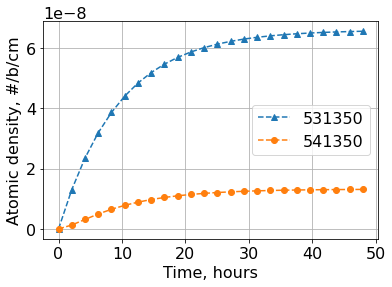

In [14]:
res.plot("Nt", timeUnits="hours", markers=['--^', '--o'], isotopes=[531350, 541350],
         ylabel="Atomic density, #/b/cm")

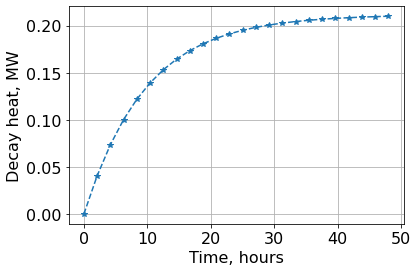

In [15]:
res.plot("totalQt", timeUnits="hours", norm=1E+6, ylabel="Decay heat, MW")

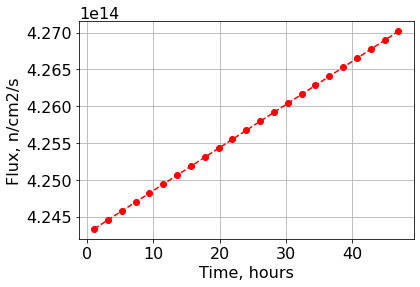

In [16]:
res.plot("flux", timeUnits="hours", markers="--ro", ylabel="Flux, n/cm2/s")